<a href="https://colab.research.google.com/github/BaileyMeche/ecma33230_macrocrises_sp25/blob/main/pset2/pset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("Roots")
Pkg.add("Interpolations")
Pkg.add("NonlinearSolve")
Pkg.add("LaTeXStrings")
using Plots, Roots, Interpolations, NonlinearSolve

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed CompositionsBase ─ v0.1.2
   Installed CommonSolve ────── v0.2.4
   Installed Accessors ──────── v0.1.42
   Installed Roots ──────────── v2.2.7
    Updating `~/.julia/environments/v1.10/Project.toml`
  [f2b01f46] + Roots v2.2.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [7d9f7c33] + Accessors v0.1.42
  [38540f10] + CommonSolve v0.2.4
  [a33af91c] + CompositionsBase v0.1.2
  [f2b01f46] + Roots v2.2.7
Precompiling packages...
   1540.8 ms  ✓ CommonSolve
   1099.6 ms  ✓ CompositionsBase
    506.1 ms  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt
   2852.9 ms  ✓ Accessors
    620.2 ms  ✓ Accessors → LinearAlgebraExt
   1341.9 ms  ✓ Accessors → StructArraysExt
   1484.9 ms  ✓ Accessors → IntervalSetsExt
   2041

## 4 (12 points)
Consider the Arellano (2008) model of sovereign default discussed in class. Sketch a 2-D graph that displays the default policy of the government in terms of the default income threshold $y^*(B)$. Your graph should include at least the following description/labels as defined in the lecture: $y^*(B)$, 0, $y$, $B$, $\bar{B}$, $\underline{B}$, $y_{\min}$, $y_{\max}$, $B^*$, $Z$, repayment region, default region.

### Solution
We plot a $(B \times y)$ figure for the following function
\begin{align*}
  V^r(B,y) &= 2B + y^2
  \\ V^d(y) &= 0.3y
  \\ y^*(B) &= \frac{1}{2}\left(0.3+\sqrt{(-0.3)^{2}-4\left(2B\right)}\right)
\end{align*}

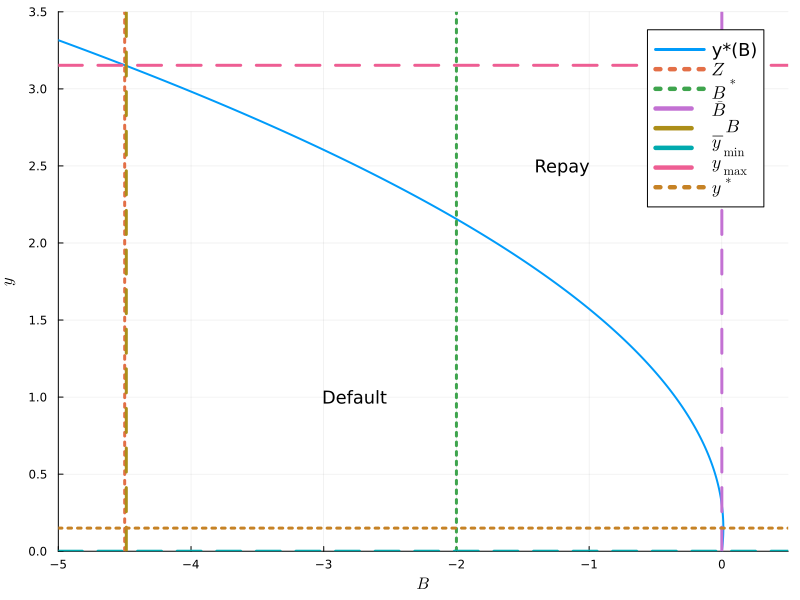

"/content/q4.png"

In [19]:
using Plots, LaTeXStrings

# Set up your y-grid and compute the B(y) curve
y      = 0:0.001:5
B_of_y = @. (0.3*y - y^2) / 2

# set B' \geq -Z
Z = -4.5

# Basic threshold plot
plt = plot(B_of_y, y,
   linewidth=2,
   xlabel=L"B",
   ylabel=L"y",
   label="y*(B)",
   xlims=(Z - 0.5, 0.5), ylims=(0, 3.5),
   size=(800,600),
   legendfontsize= 12,
   legend=:topright)

# y_min, y_max
y_min = minimum(y[(B_of_y .>= Z)])    # =0 as expected
y_max = maximum(y[(B_of_y .>= Z)])

# Inversion at those bounds gives the sup/inf debt cutoffs
B_low  = (0.3*y_min - y_min^2) / 2
B_high = (0.3*y_max - y_max^2) / 2

# Find the “highest” point *within* the mask
idx    = argmax(B_of_y)
#B_star = B_of_y[idx]
y_star = y[idx]

# \Add all the lines & annotations
vline!([Z], linestyle=:dot, linewidth=3, label=L"Z")
vline!([-2], linestyle=:dot, linewidth=3, label=L"B^*")
vline!([B_low],  linestyle=:dash, linewidth=3,label=L"\bar{B}")
vline!([B_high+0.01], linestyle=:dash, linewidth=3,label=L"\_{B}")     # added 0.01 to see the line
hline!([y_min], linestyle=:dash, linewidth=3, label=L"y_{\min}")
hline!([y_max], linestyle=:dash, linewidth=3,label=L"y_{\max}")
hline!([y_star],linestyle=:dot,  linewidth=3,label=L"y^*")
annotate!(-3, 1, text("Default", 12, :left))
annotate!(-1, 2.5, text("Repay",   12, :right))

display(plt)
savefig(plt, "q4.png")

## 5. (20 points)
The benevolent and strategic government of a small open economy maximizes an expected infinite stream of period utilities from consumption $u(c)$, discounted with a discount factor $\beta = 0.8$. Stochastic endowments $y_t \geq 0$ follow a Markov process with the AR(1) transition rule:
  $$
  f(y_{t+1} \mid y_t): \quad \ln(y_{t+1}) = \rho \ln(y_t) + \sigma_\varepsilon \varepsilon_{t+1},
  $$
  where $\rho = 0.9$ is the persistence and $\sigma_\varepsilon = 0.5$ scales the standard deviation of innovations $\varepsilon_t$, which are drawn from a uniform distribution $U[0, 1]$. The sovereign sells bonds $B'$ ($B' < 0$ means debt) facing a pricing function $q(B', y)$ to risk-neutral lenders. Lenders are competitive and take the default probability $\delta$ as given. The international risk-free net interest rate is $r = 0.01$. Default entails an output loss $c(y) \leq y$ and a stochastic exclusion from credit markets with probability $(1 - \theta)$, where $\theta = 0.2$. During exclusion, previous debt is frozen and no new debt can be issued. Upon reintegration, the government imposes a haircut $h = 0.7$ on the frozen debt, meaning it has now outstanding debt of a share $1 - h$ of previous debt.

  ### d)
  As before, $y^*(B) = 5 + \frac{15}{B - 3}$ and $y = 1$. Plot today’s Laffer curve in Julia. Plot $B'$ on the x-axis from -2 to 0.5. Include your code.

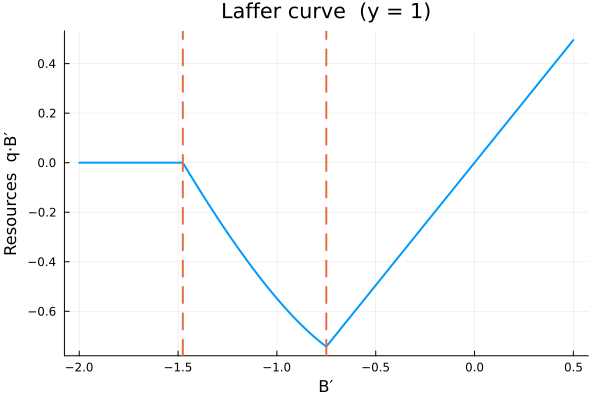

"/content/q5.png"

In [3]:
default(linewidth=2)              # nice thick lines

# parameters
r  = 0.01
ρ  = 0.9
σ  = 0.5
y0 = 1.0

y_s(B) = 5 + 15/(B-3)

# repayment probability
function repay_prob(B)
    cutoff = y_s(B)
    cutoff ≤ 0 && return 1.0        # always repay if threshold ≤ 0
    ε_cut  = (log(cutoff) - ρ*log(y0)) / σ
    ε_cut  = clamp(ε_cut, 0.0, 1.0) # keep in [0,1]
    return 1 - ε_cut                # uniform CDF
end

Bgrid = collect(-2.0:0.01:0.5)
q      = [repay_prob(B)/(1+r) for B in Bgrid]
R      = Bgrid .* q

plt = plot(Bgrid, R;
           xlabel  = "B′",
           ylabel  = "Resources  q·B′",
           title   = "Laffer curve  (y = 1)",
           legend  = false)

# guide lines for  B̲ ≈ -1.4759  and  B̄ ≈ −0.75
vline!(plt, [-1.4759, -0.75]; line = :dash)
annotate!(plt, (-1.4759,  minimum(R)), text("  B̲", 8))
annotate!(plt, (-0.75, minimum(R)), text("  B̄", 8))

display(plt)
savefig(plt, "q5.png")